In [108]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('generator_dataset.csv')

# Display the first few rows of the DataFrame
df.head()

,ID,RPM,VIBRATION,STATUS
0,1,498,604,faulty
1,2,517,594,faulty
2,3,541,574,faulty
3,4,555,587,faulty
4,5,572,537,faulty


In [109]:
df.shape

(68, 4)

# Predicting if a person would buy life insurnace based on his age using logistic regression (codebasic)

https://www.youtube.com/watch?v=zM4VZR0px8E

In [28]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [29]:
df = pd.read_csv("insurance_data.csv")
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


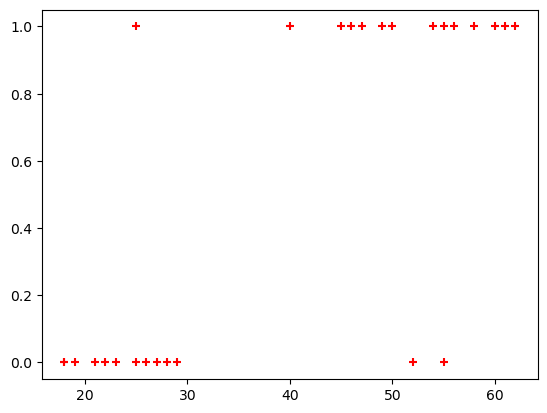

In [30]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8)
X_test

,age
14,49
16,25
2,47
5,56
4,46
1,25


In [32]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [33]:
model.fit(X_train, y_train)


LogisticRegression()

In [34]:
X_test


,age
14,49
16,25
2,47
5,56
4,46
1,25


In [35]:
y_predicted = model.predict(X_test)
y_predicted

array([1, 0, 1, 1, 1, 0], dtype=int64)

In [15]:
model.predict_proba(X_test)

array([[3.41945061e-03, 9.96580549e-01],
       [9.59445156e-01, 4.05548438e-02],
       [1.82167585e-03, 9.98178324e-01],
       [2.74536964e-04, 9.99725463e-01],
       [5.16032280e-04, 9.99483968e-01],
       [7.07431147e-04, 9.99292569e-01]])

In [16]:
model.score(X_test,y_test)

0.6666666666666666

In [17]:
X_test


,age
24,50
0,22
3,52
17,58
5,56
6,55


In [18]:
# model.coef_ indicates value of m in y=m*x + b equation
model.coef_

array([[0.3156625]])

In [21]:
# model.intercept_ indicates value of b in y=m*x + b equation
model.intercept_

array([-10.10827493])

In [22]:
# Lets defined sigmoid function now and do the math with hand
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [23]:
def prediction_function(age):
    z = 0.3156625 * age - 10.10827493 # 0.04150133 ~ 0.042 and -1.52726963 ~ -1.53
    y = sigmoid(z)
    return y

In [24]:
age = 35
prediction_function(age)

0.7190819966255005

In [25]:
# larger than 0.5, will buy insurance

# Coding Logistic regression

Iteration 1: Cross-Entropy Loss = 0.6931, m1 = -0.0000, m2 = 0.0212, b = 0.0000
Iteration 101: Cross-Entropy Loss = 0.4276, m1 = 0.4839, m2 = 1.2249, b = -0.0039
Iteration 201: Cross-Entropy Loss = 0.3333, m1 = 0.9823, m2 = 1.8585, b = -0.0113
Iteration 301: Cross-Entropy Loss = 0.2830, m1 = 1.3523, m2 = 2.3180, b = -0.0183
Iteration 401: Cross-Entropy Loss = 0.2523, m1 = 1.6391, m2 = 2.6808, b = -0.0248
Iteration 501: Cross-Entropy Loss = 0.2315, m1 = 1.8723, m2 = 2.9806, b = -0.0308
Iteration 601: Cross-Entropy Loss = 0.2166, m1 = 2.0689, m2 = 3.2359, b = -0.0365
Iteration 701: Cross-Entropy Loss = 0.2054, m1 = 2.2387, m2 = 3.4583, b = -0.0420
Iteration 801: Cross-Entropy Loss = 0.1966, m1 = 2.3883, m2 = 3.6553, b = -0.0472
Iteration 901: Cross-Entropy Loss = 0.1896, m1 = 2.5220, m2 = 3.8322, b = -0.0523


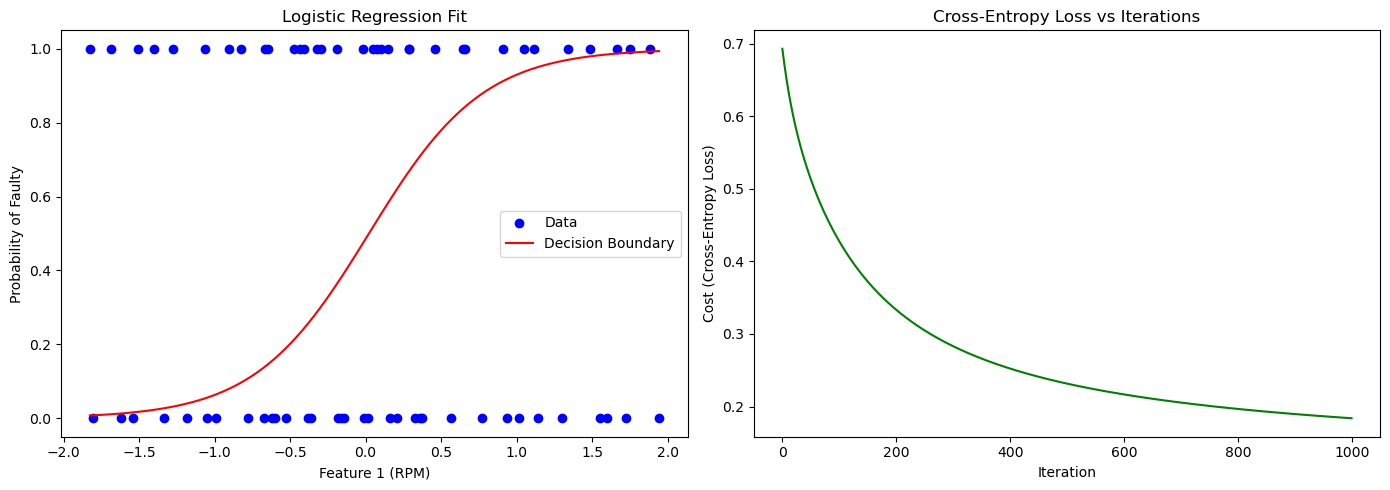

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(y, y_pred):
    n = len(y)
    cost = -(1/n) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return cost

def gradient_descent(X, y, learning_rate=0.01, iterations=1000):
    m1, m2, b = 0.0, 0.0, 0.0  # estimate
    n = len(y)
    cost_history = []

    for i in range(iterations):
        # Compute predictions
        y_pred = sigmoid(m1 * X[:, 0] + m2 * X[:, 1] + b)  # percent 
        
        # Compute cost
        cost = compute_cost(y, y_pred)
        
        # Calculate gradients
        dm1 = (1/n) * np.sum((y_pred - y) * X[:, 0]) # weight0
        dm2 = (1/n) * np.sum((y_pred - y) * X[:, 1]) # weight1
        db = (1/n) * np.sum(y_pred - y) # bias  or weight2 
        
        # Update parameters
        m1 -= learning_rate * dm1
        m2 -= learning_rate * dm2
        b -= learning_rate * db
        
        # Save the cost  
        cost_history.append(cost)
        
        if i % 100 == 0:
            print(f"Iteration {i+1}: Cross-Entropy Loss = {cost:.4f}, m1 = {m1:.4f}, m2 = {m2:.4f}, b = {b:.4f}")
    
    return m1, m2, b, cost_history

def plot_logistic_regression(X, y, m1, m2, b, cost_history):
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))

    # Plot the data and the decision boundary
    ax[0].scatter(X[:, 0], y, color='blue', label='Data')
    x_boundary = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    y_boundary = sigmoid(m1 * x_boundary + m2 * np.mean(X[:, 1]) + b)
    ax[0].plot(x_boundary, y_boundary, color='red', label='Decision Boundary')
    ax[0].set_xlabel('Feature 1 (RPM)')
    ax[0].set_ylabel('Probability of Faulty')
    ax[0].set_title(f'Logistic Regression Fit')
    ax[0].legend()

    # Plot the cost history
    ax[1].plot(range(len(cost_history)), cost_history, color='green')
    ax[1].set_xlabel('Iteration')
    ax[1].set_ylabel('Cost (Cross-Entropy Loss)')
    ax[1].set_title(f'Cross-Entropy Loss vs Iterations')

    plt.tight_layout()
    plt.show()

# Load the dataset
df = pd.read_csv('generator_dataset.csv')

# Convert STATUS to binary (faulty = 1, good = 0)
df['STATUS'] = df['STATUS'].apply(lambda x: 1 if x == 'faulty' else 0)

# Define the features and target
X = df[['RPM', 'VIBRATION']].values
y = df['STATUS'].values

# Normalize the features
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Run gradient descent
m1, m2, b, cost_history = gradient_descent(X, y, learning_rate=0.07, iterations=1000)

# Plot the results
plot_logistic_regression(X, y, m1, m2, b, cost_history)


In [50]:
X.shape

(68, 2)

# Iris Classification (Logistic Regression)

https://medium.com/@suryadharun4772/iris-classification-using-logistic-regression-72f66d2628f0

In [113]:
columns = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
iris_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names=columns)

In [114]:
iris_data

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [54]:
#First step in learning about a dataset is to look at what are the columns and undestand them.
iris_data.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [56]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [115]:
iris_data.columns

Index(['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class'], dtype='object')

In [116]:
iris_data.rename(columns={'sepal-length':'sl','sepal-width':'sw','petal-length':'pl','petal-width':'pw'}, inplace=True)
iris_data.columns

Index(['sl', 'sw', 'pl', 'pw', 'class'], dtype='object')

In [117]:
#1 describe function — very numerical and not intuitive
iris_data.describe().round(2)

,sl,sw,pl,pw
count,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


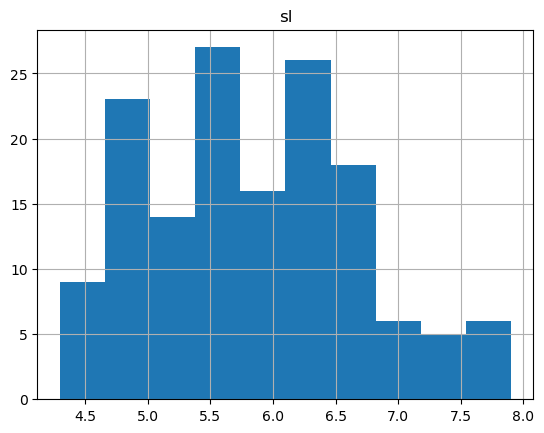

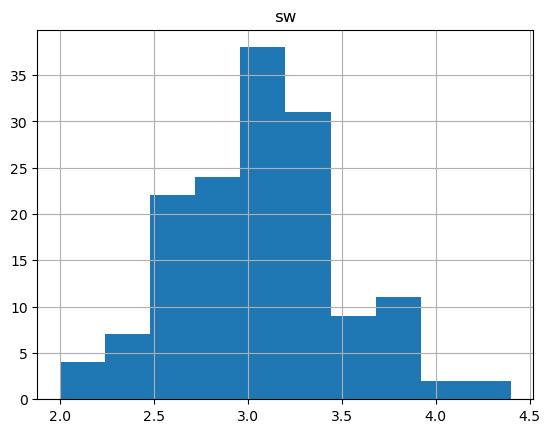

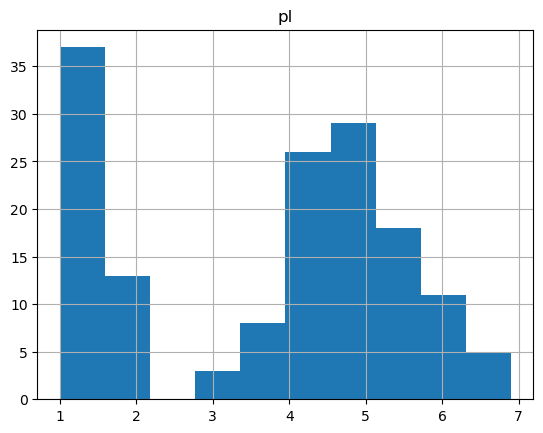

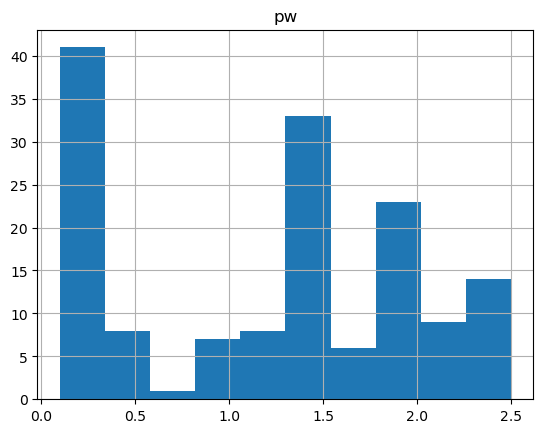

In [65]:
#2 plot histogram — quantitative datasets
columns = ['sl', 'sw', 'pl', 'pw']
for column in columns:
    iris_data[f'{column}'].hist()
    plt.title(f'{column}')
    plt.show()

Outlier Detection: Now we need to understand the outliers in data. For which we can check for box plots for each of the variables.

<Axes: >

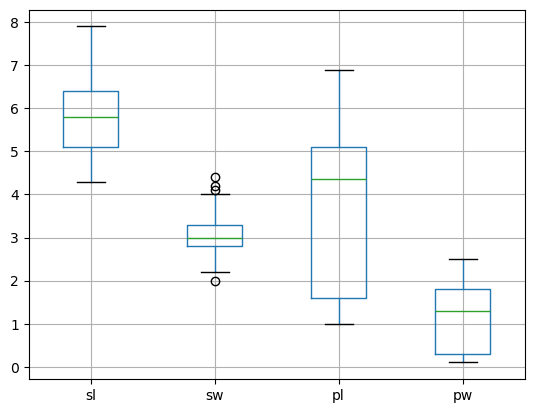

In [66]:
iris_data.boxplot(column=columns)

<Axes: title={'center': 'sl'}, xlabel='class'>

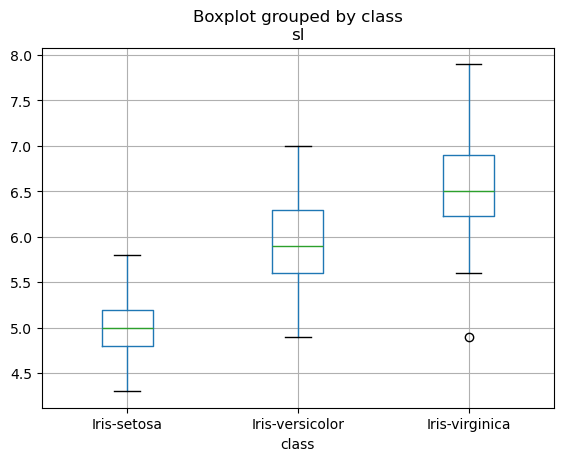

In [68]:
#For establishing relationship between the input features vs the target(class of iris), we will be using first the box plot.
iris_data.boxplot(column='sl',by='class')

<Axes: title={'center': 'sw'}, xlabel='class'>

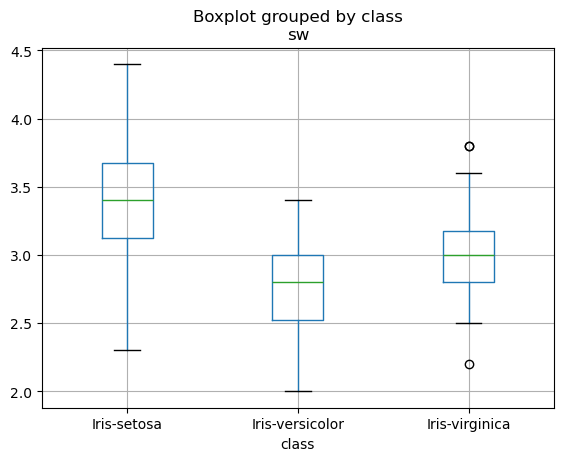

In [69]:
iris_data.boxplot(column='sw',by='class')

<Axes: title={'center': 'pl'}, xlabel='class'>

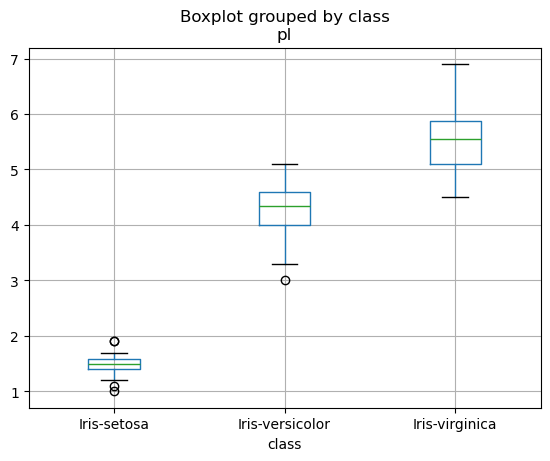

In [70]:
iris_data.boxplot(column='pl',by='class')

<Axes: title={'center': 'pw'}, xlabel='class'>

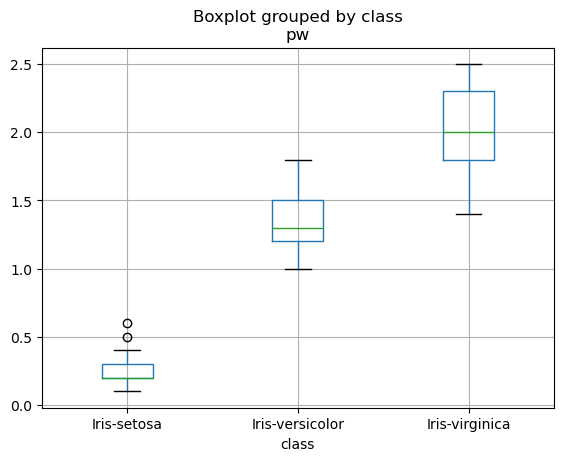

In [71]:
iris_data.boxplot(column='pw',by='class')

          sl        sw        pl        pw
sl  1.000000 -0.109369  0.871754  0.817954
sw -0.109369  1.000000 -0.420516 -0.356544
pl  0.871754 -0.420516  1.000000  0.962757
pw  0.817954 -0.356544  0.962757  1.000000


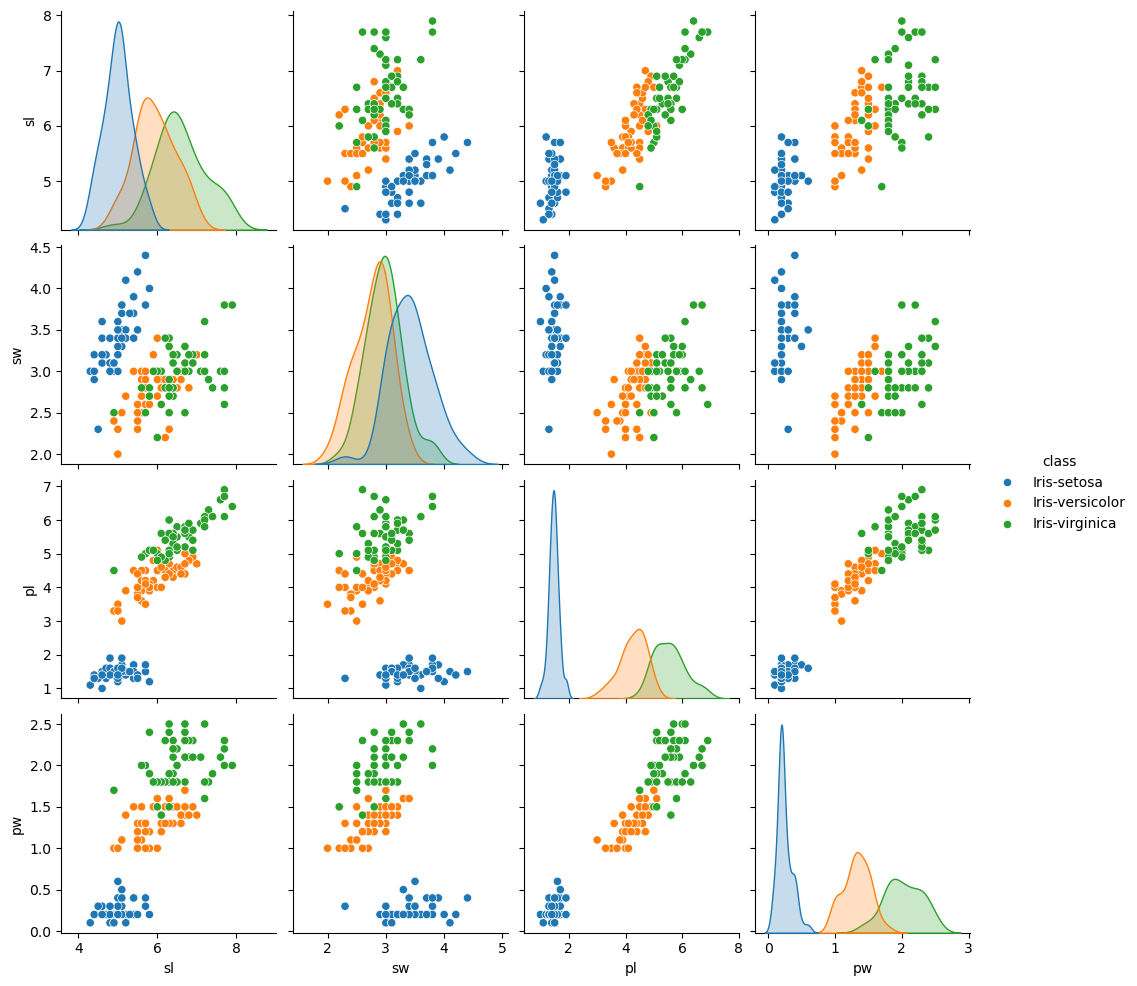

In [74]:
#Checking relationship within the features using scatter plot
import seaborn as sns
sns.pairplot(iris_data, hue='class')

# Calculate the correlation matrix, excluding the categorical 'species' column
correlation_matrix = iris_data.drop('class', axis=1).corr()

# Display the correlation matrix
print(correlation_matrix)

## Model Training

In [118]:
from sklearn.model_selection import train_test_split
X=iris_data.drop('class',axis=1)
y=iris_data['class']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=3, train_size=0.7)

In [119]:
# We will be doing a multinomial logistic regression since we have more than two classes
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=1000)

In [120]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

In [121]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(f'Mean Accuracy: {np.mean(n_scores):.3f} ({np.std(n_scores):.3f})')

Mean Accuracy: 0.965 (0.053)


In [122]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)

In [124]:
X_test.shape

(45, 4)

In [123]:
y_pred

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [95]:
y_pred_prob.round(2)

array([[0.98, 0.02, 0.  ],
       [0.97, 0.03, 0.  ],
       [0.96, 0.04, 0.  ],
       [0.94, 0.06, 0.  ],
       [0.98, 0.02, 0.  ],
       [0.  , 0.  , 1.  ],
       [0.03, 0.92, 0.06],
       [0.98, 0.02, 0.  ],
       [0.  , 0.1 , 0.9 ],
       [0.01, 0.89, 0.1 ],
       [0.03, 0.91, 0.05],
       [0.98, 0.02, 0.  ],
       [0.02, 0.94, 0.04],
       [0.02, 0.92, 0.06],
       [0.  , 0.03, 0.97],
       [0.98, 0.02, 0.  ],
       [0.  , 0.54, 0.46],
       [0.  , 0.01, 0.99],
       [0.  , 0.18, 0.82],
       [0.98, 0.02, 0.  ],
       [0.  , 0.45, 0.55],
       [0.  , 0.08, 0.92],
       [0.  , 0.13, 0.87],
       [0.  , 0.72, 0.27],
       [0.96, 0.04, 0.  ],
       [0.  , 0.01, 0.99],
       [0.  , 0.2 , 0.8 ],
       [0.02, 0.95, 0.03],
       [0.16, 0.84, 0.  ],
       [0.  , 0.75, 0.25],
       [0.98, 0.02, 0.  ],
       [0.94, 0.06, 0.  ],
       [0.  , 0.1 , 0.9 ],
       [0.  , 0.85, 0.15],
       [0.97, 0.03, 0.  ],
       [0.97, 0.03, 0.  ],
       [0.  , 0.45, 0.55],
 

In [96]:
#evaluating the prediction on test data
from sklearn.metrics import accuracy_score
print('accuracy score =',accuracy_score(y_test,y_pred)*100)

accuracy score = 97.77777777777777


In [99]:
from sklearn.metrics import classification_report
print('classification report \n',classification_report(y_test,y_pred))

classification report 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       1.00      0.93      0.96        14
 Iris-virginica       0.93      1.00      0.97        14

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [ ]:
from sklearn.metrics import confusion_matrix
